In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('auto_fraud_detection.csv')
df.head(15)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [75]:
#lets check the shape
df.shape

(1000, 40)

In [76]:
#Lets get to know about columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [77]:
#Lets check what the target column shows
df['fraud_reported'].describe

<bound method NDFrame.describe of 0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object>

In [78]:
#lets check the datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [79]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [80]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [81]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [82]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [83]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [84]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [85]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [86]:
#lets drop some columns which are not important for us 
df.drop(['policy_number','policy_bind_date','policy_csl','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_date','collision_type','incident_type','collision_type','authorities_contacted','incident_state','incident_city','incident_location','auto_make','auto_model'],axis=1,inplace=True)

In [87]:
df.head(15)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
0,328,48,OH,1000,1406.91,0,466132,MALE,53300,0,...,1,2,YES,71610,6510,13020,52080,2004,Y,NaN
1,228,42,IN,2000,1197.22,5000000,468176,MALE,0,0,...,0,0,?,5070,780,780,3510,2007,Y,NaN
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,35100,0,...,2,3,NO,34650,7700,3850,23100,2007,N,NaN
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,48900,-62400,...,1,2,NO,63400,6340,6340,50720,2014,Y,NaN
4,228,44,IL,1000,1583.91,6000000,610706,MALE,66000,-46000,...,0,1,NO,6500,1300,650,4550,2009,N,NaN
5,256,39,OH,1000,1351.10,0,478456,FEMALE,0,0,...,0,2,NO,64100,6410,6410,51280,2003,Y,NaN
6,137,34,IN,1000,1333.35,0,441716,MALE,0,-77000,...,0,0,?,78650,21450,7150,50050,2012,N,NaN
7,165,37,IL,1000,1137.03,0,603195,MALE,0,0,...,2,2,YES,51590,9380,9380,32830,2015,N,NaN
8,27,33,IL,500,1442.99,0,601734,FEMALE,0,0,...,1,1,YES,27700,2770,2770,22160,2012,N,NaN
9,212,42,IL,500,1315.68,0,600983,MALE,0,-39300,...,2,1,?,42300,4700,4700,32900,1996,N,NaN


In [88]:
#lets convert some categorical columns into numerical columns
policy_state = pd.get_dummies(df['policy_state'],drop_first=True)

In [89]:
insured_sex = pd.get_dummies(df['insured_sex'],drop_first=True)

In [90]:
df.drop(['policy_state','insured_sex'],axis=1,inplace=True)

In [91]:
df = pd.concat([df,policy_state,insured_sex],axis=1)

In [92]:
df.head(15)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39,IN,OH,MALE
0,328,48,1000,1406.91,0,466132,53300,0,Major Damage,5,...,71610,6510,13020,52080,2004,Y,NaN,0,1,1
1,228,42,2000,1197.22,5000000,468176,0,0,Minor Damage,8,...,5070,780,780,3510,2007,Y,NaN,1,0,1
2,134,29,2000,1413.14,5000000,430632,35100,0,Minor Damage,7,...,34650,7700,3850,23100,2007,N,NaN,0,1,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,Major Damage,5,...,63400,6340,6340,50720,2014,Y,NaN,0,0,0
4,228,44,1000,1583.91,6000000,610706,66000,-46000,Minor Damage,20,...,6500,1300,650,4550,2009,N,NaN,0,0,1
5,256,39,1000,1351.10,0,478456,0,0,Major Damage,19,...,64100,6410,6410,51280,2003,Y,NaN,0,1,0
6,137,34,1000,1333.35,0,441716,0,-77000,Minor Damage,0,...,78650,21450,7150,50050,2012,N,NaN,1,0,1
7,165,37,1000,1137.03,0,603195,0,0,Total Loss,23,...,51590,9380,9380,32830,2015,N,NaN,0,0,1
8,27,33,500,1442.99,0,601734,0,0,Total Loss,21,...,27700,2770,2770,22160,2012,N,NaN,0,0,0
9,212,42,500,1315.68,0,600983,0,-39300,Total Loss,14,...,42300,4700,4700,32900,1996,N,NaN,0,0,1


In [93]:
df.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_severity               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
fraud_reported                  object
_c39                           float64
IN                               uint8
OH                               uint8
MALE                             uint8
dtype: object

In [94]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [95]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [96]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [97]:
#Lets convert again this incident severity into numerical column
incident_severity = pd.get_dummies(df['incident_severity'],drop_first=True)

In [98]:
df.drop(['incident_severity'],axis=True,inplace=True)

In [99]:
df = pd.concat([df,incident_severity],axis=1)

In [100]:
df.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
fraud_reported                  object
_c39                           float64
IN                               uint8
OH                               uint8
MALE                             uint8
Minor Damage                     uint8
Total Loss               

In [101]:
#Here we consider one scenario that property damage has either yes or no answer but as in our dataset ? is present 
#so in order to consider this column we will replace ? by 0.5
property_damage = df['property_damage'].replace("?",0.5)

In [102]:
property_damage.value_counts()

0.5    360
NO     338
YES    302
Name: property_damage, dtype: int64

In [103]:
property_damage = property_damage.replace("NO",0)

In [104]:
property_damage.value_counts()

0.5    360
0      338
YES    302
Name: property_damage, dtype: int64

In [105]:
property_damage = property_damage.replace("YES",1)

In [106]:
property_damage.value_counts()

0.5    360
0.0    338
1.0    302
Name: property_damage, dtype: int64

In [107]:
df.drop(['property_damage'],axis=1,inplace=True)

In [108]:
df = pd.concat([df,property_damage],axis=1)

In [109]:
#Lets check the property damage column again
df['property_damage']

0      1.0
1      0.5
2      0.0
3      0.5
4      0.0
      ... 
995    1.0
996    1.0
997    0.5
998    0.5
999    0.5
Name: property_damage, Length: 1000, dtype: float64

In [110]:
#Here also we will use the same logic as we implemented in property_damage
police_report_available = df['police_report_available'].replace("?",0.5)

In [111]:
police_report_available.value_counts()

NO     343
0.5    343
YES    314
Name: police_report_available, dtype: int64

In [112]:
police_report_available = police_report_available.replace("NO",0)

In [113]:
police_report_available.value_counts()

0      343
0.5    343
YES    314
Name: police_report_available, dtype: int64

In [114]:
police_report_available = police_report_available.replace("YES",1)

In [115]:
police_report_available.value_counts()

0.0    343
0.5    343
1.0    314
Name: police_report_available, dtype: int64

In [116]:
df.drop(['police_report_available'],axis=1,inplace=True)

In [117]:
df = pd.concat([df,police_report_available],axis=1)

In [118]:
df.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
fraud_reported                  object
_c39                           float64
IN                               uint8
OH                               uint8
MALE                             uint8
Minor Damage                     uint8
Total Loss                       uint8
Trivial Damage                   uint8
property_damage          

In [119]:
#Lets convert fraud reported value "Y" as 1
fraud_reported = df['fraud_reported'].replace("Y",1)

In [120]:
#Lets convert fraud reported value "N" as 0
fraud_reported = fraud_reported.replace("N",0)

In [121]:
#Lets Check again for the assurity
fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [122]:
df.drop(['fraud_reported'],axis=1,inplace=True)

In [123]:
df = pd.concat([df,fraud_reported],axis=1)

In [124]:
#Final Check with the datatypes for the final dataframe
df.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
_c39                           float64
IN                               uint8
OH                               uint8
MALE                             uint8
Minor Damage                     uint8
Total Loss                       uint8
Trivial Damage                   uint8
property_damage                float64
police_report_available  

In [125]:
df.drop(["_c39"],axis=1,inplace=True)

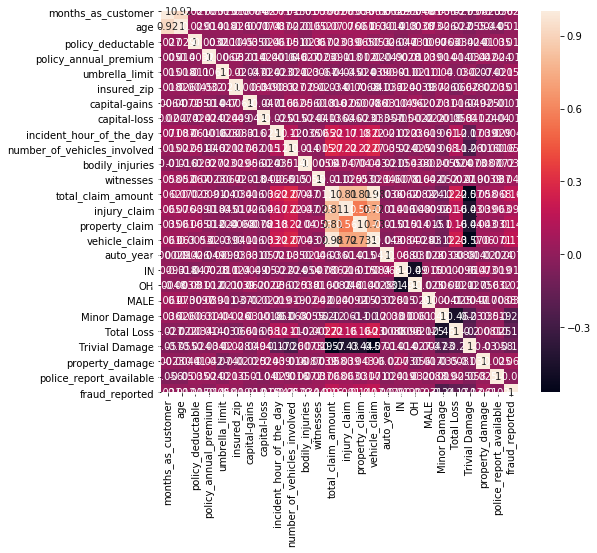

In [126]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

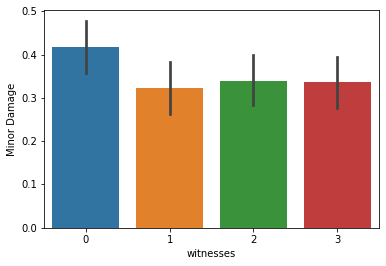

In [127]:
#Lets check witnesses with minor gamage
sns.barplot(x="witnesses",y="Minor Damage",data=df)
plt.show()

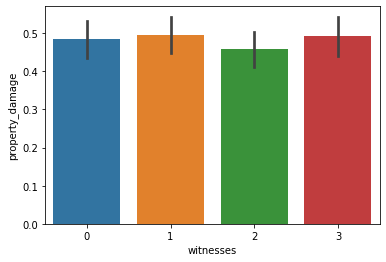

In [128]:
#Lets check witnesses with property damage
sns.barplot(x="witnesses",y="property_damage",data=df)
plt.show()

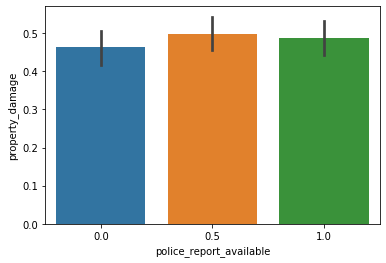

In [129]:
#Lets check police report available with property damage
sns.barplot(x="police_report_available",y="property_damage",data=df)
plt.show()

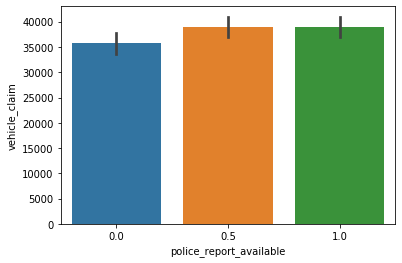

In [130]:
#Lets check police report available at vehicle claim
sns.barplot(x="police_report_available",y="vehicle_claim",data=df)
plt.show()

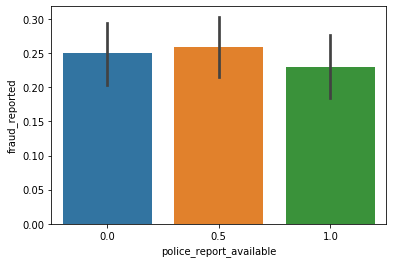

In [62]:
#Lets check police report available with fraid reported
sns.barplot(x="police_report_available",y="fraud_reported",data=df)
plt.show()

In [146]:
#lets separate x and y
x = df.drop(columns=["fraud_reported"],axis=1)
y = df[["fraud_reported"]]

In [147]:
x.shape

(1000, 25)

In [148]:
y.shape

(1000, 1)

In [149]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [150]:
print(x_train.shape,x_test.shape)

(700, 25) (300, 25)


In [151]:
print(y_train.shape,y_test.shape)

(700, 1) (300, 1)


In [152]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1000, 26)
(892, 26)


In [153]:
#lets create an objects for the models
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
LR = LogisticRegression()
DT = DecisionTreeClassifier(random_state=6)
GNB = GaussianNB()

In [154]:
models = []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [155]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [156]:
from sklearn.model_selection import cross_val_score

*************************** KNeighborsClassifier *******************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy Score 0.73


cross_val_score =  0.736954695469547


roc_auc_curve 0.5176136363636364


classification_report               precision    recall  f1-score   support

           0       0.74      0.97      0.84       220
           1       0.45      0.06      0.11        80

    accuracy                           0.73       300
   macro avg       0.60      0.52      0.48       300
weighted avg       0.66      0.73      0.65       300



[[214   6]
 [ 75   5]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************** SVC *******************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf',

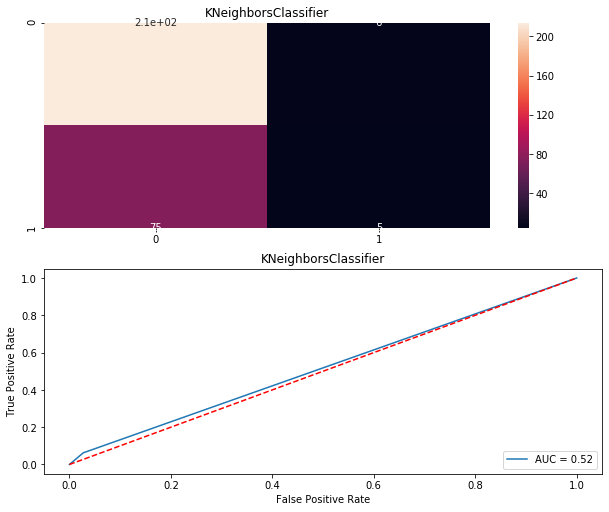

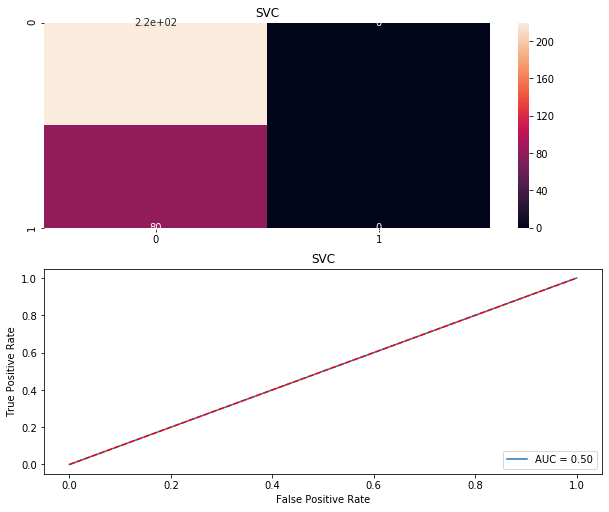

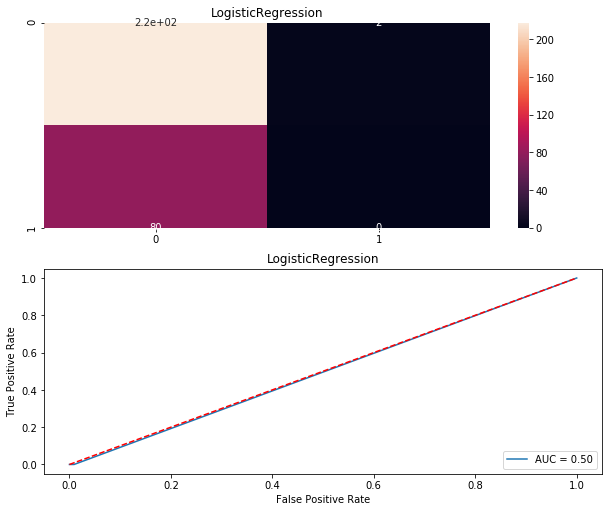

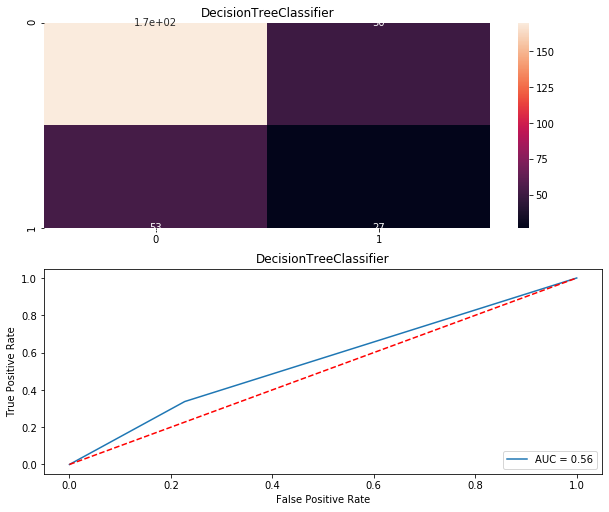

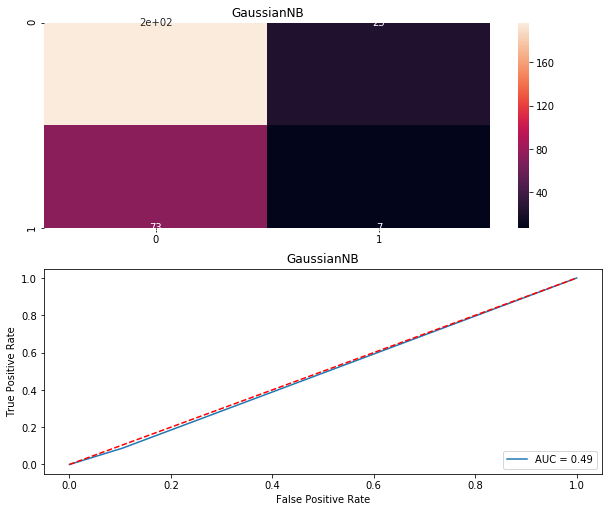

In [157]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('***************************',name,'*******************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print('Accuracy Score',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print('roc_auc_curve',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label = 'AUC = %0.2f' %roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

In [158]:
result = pd.DataFrame({'Model':Model ,'Accuracy_score':score, 'Cross val Score':cvs ,'Roc auc curve':rocscore})
result

,Model,Accuracy_score,Cross val Score,Roc auc curve
0,KNeighborsClassifier,73.000000,73.695470,51.761364
1,SVC,73.333333,75.301530,50.000000
2,LogisticRegression,72.666667,75.001530,49.545455
3,DecisionTreeClassifier,65.666667,70.323332,55.511364
4,GaussianNB,68.000000,67.808241,49.147727


In [159]:
# I will choose SVC for this model as it is giving higher accuracy

In [160]:
from sklearn.externals import joblib

In [161]:
joblib.dump(SV , 'model_frauddetection.pkl')

['model_frauddetection.pkl']

In [162]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], d